### Лабораторная работа №2. Методы классификации данных
Выполнил: Гусев Павел 20-ИВТ-3

Вариант №2

Задание

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

1.  Id number: Идентификационный номер
2.  RI: Индекс преломления
3.  Na: Натрий
4.  Mg: Магний
5.  Al: Аллюминий
6.  Si: Кремний
7.  K:  Калий
8.  Ca: Кальций
9.  Ba: Барий
10. Fe: Железо
11. Type of glass: Тип стекла
    - 1 Окна для сооружений, обработанные
    - 2 Окна для сооружений, не обработанные
    - 3 Окна для автомобилей, обработанные
    - 4 Окна для автомобилей, не обработанные
    - 5 Для контейнеров
    - 6 Для посуды
    - 7 Для фар

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [2]:
import pandas as pd

In [3]:
glass_df = pd.read_csv('glass.csv')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
print('Размер набора данных до удаления дубликатов:', glass_df.index.size)
glass_df.drop_duplicates(inplace = True)
print('Размер набора данных после удаления дубликатов:', glass_df.index.size)

Размер набора данных до удаления дубликатов: 214
Размер набора данных после удаления дубликатов: 213


### 3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:>

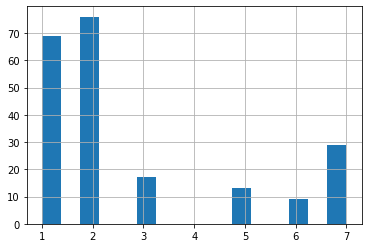

In [5]:
glass_df.Type.hist(bins = 16)

### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [6]:
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler

<AxesSubplot:>

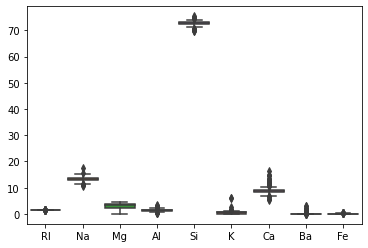

In [7]:
df = glass_df.drop('Type', axis = 1)
sn.boxplot (data = df)

<AxesSubplot:>

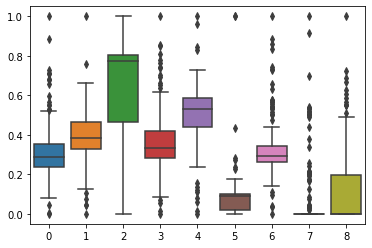

In [7]:
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)

sn.boxplot (data = df)

### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [1]:
dummie_df = pd.get_dummies(glass_df.condition, prefix = 'Type')
glass_df2 = glass_df.drop('Type', axis = 1)
glass_df2 = glass_df2.merge(dummie_df, left_index=True, right_index=True)
glass_df2

NameError: name 'pd' is not defined

### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

In [9]:
corr_df = glass_df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
corr_df = corr_df.corr()
corr_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


<AxesSubplot:>

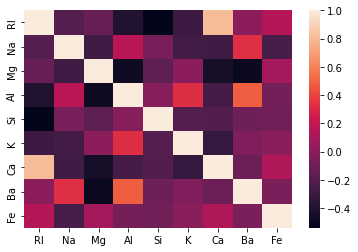

In [10]:
sn.heatmap(corr_df)

### 7. Заполните пропущенные значения в данных

In [11]:
glass_df.count()

RI      213
Na      213
Mg      213
Al      213
Si      213
K       213
Ca      213
Ba      213
Fe      213
Type    213
dtype: int64

Пропущенных значений нет

### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию

In [19]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
import matplotlib.pyplot as plt

In [13]:
x = glass_df2.drop('Type_2', axis = 1)
y = glass_df2['Type_2']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33 , random_state = 42)

### KNN

In [14]:
knn = KNeighborsClassifier()

search = GridSearchCV(knn, {'n_neighbors': [x for x in range(3, 50)],
    'weights' : ['distance', 'uniform'],
    'metric' : ['euclidean' , 'manhattan']
    })
search.fit(x_train, y_train)

n = search.best_estimator_.n_neighbors
best = search.best_score_
best_params = search.best_params_
best_score = search.best_score_

print("Best score", best_score)
print("Best params", best_params)

knn = KNeighborsClassifier(**best_params)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print('Accuracy knn: %.5f' % accuracy_score(y_test, knn_predict))
print('Accuracy knn: %.5f' % accuracy_score(y_train, knn.predict(x_train)))

Best score 0.9504926108374384
Best params {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy knn: 0.92958
Accuracy knn: 1.00000


### PPN

In [36]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn,param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 50, 2)]}, 
n_jobs=-1)
search.fit(x_train, y_train)
best_params = search.best_params_
best_score = search.best_score_

print("Best score", best_score)
print("Best params", best_params)

ppn = Perceptron(**best_params)
ppn.fit(x_train, y_train)
ppn_predict = ppn.predict(x_test)
print('Accuracy ppn: %.5f' % accuracy_score(y_test, ppn_predict))

Best score 0.647783251231527
Best params {'alpha': 0.05263157894736842, 'max_iter': 1}
Accuracy ppn: 0.63380


C:\Users\pavel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\pavel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [27]:
from sklearn.calibration import CalibratedClassifierCV
test_y_inversion = [1-y for y in y_test]

ky_pred = knn.predict_proba(x_test)

# cppn = CalibratedClassifierCV(ppn, cv=2)
# cppn.fit(x_train, y_train)
# py_pred = cppn.predict_proba(x_test)
py_pred = ppn.fit(x_train, y_train).decision_function(x_test)

[-646.04818283 -766.78220736 -636.51513936 -764.42369728 -636.92019181
 -690.81597092 -645.89168217 -643.08249487 -639.28839487 -625.94197363
 -748.33515939 -688.1944309  -635.48389301 -638.73840024 -689.67937221
 -723.81499257 -776.68049958 -652.52116575 -651.01427034 -680.86645116
 -649.7119767  -763.05319728 -779.14874888 -758.66550462 -626.60279509
 -674.38020399 -640.3263814  -646.13738184 -679.9213664  -638.11807965
 -648.15114196 -636.6917917  -646.07417834 -639.31889662 -663.56710265
 -785.54279345 -689.51233035 -649.90699871 -648.37739005 -641.42839706
 -651.50047571 -717.439894   -659.07545852 -635.00910068 -641.9203329
 -675.01528329 -675.10444855 -626.49587341 -692.24715381 -633.86988765
 -648.72023268 -653.85018666 -639.54552315 -630.96407308 -648.62517965
 -646.81628502 -684.22937374 -631.49948414 -645.55483728 -638.53513936
 -643.32390024 -630.14957724 -646.17947527 -784.55030987 -676.89484965
 -637.9396917  -635.78713936 -738.87747593 -740.7701652  -646.9414837
 -650.85

C:\Users\pavel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### ROC-кривая

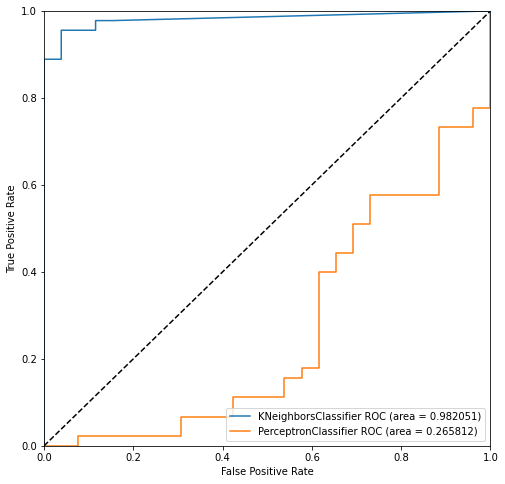

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

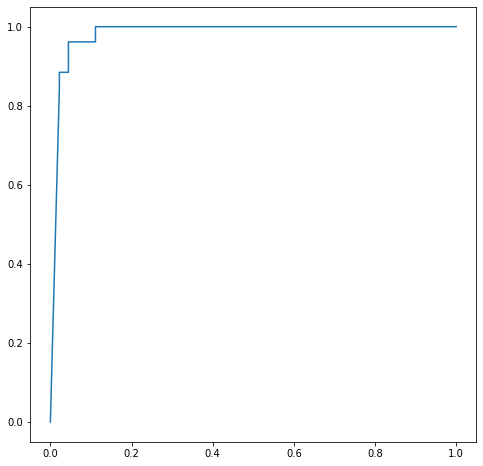

In [38]:
plt.figure(figsize=(8,8))

fpr = dict()
tpr = dict()
tpr, fpr, thresholds = roc_curve(y_test, ky_pred[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

tpr, fpr, thresholds = roc_curve(y_test, py_pred)
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.show()

plt.figure(figsize=(8,8))

fpr, tpr, thresholds = roc_curve(y_test, ky_pred[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

fpr, tpr, thresholds = roc_curve(y_test, py_pred[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))  

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.show()

### PR-кривая

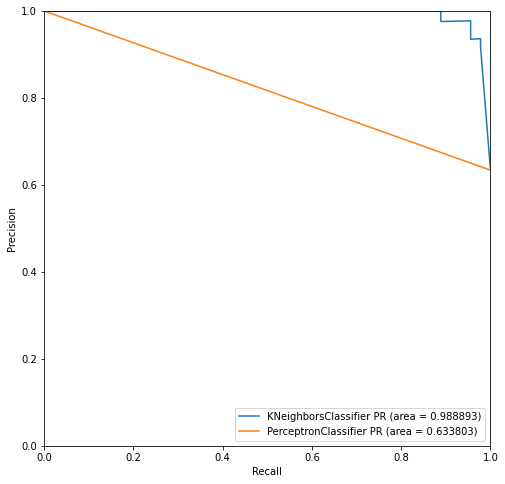

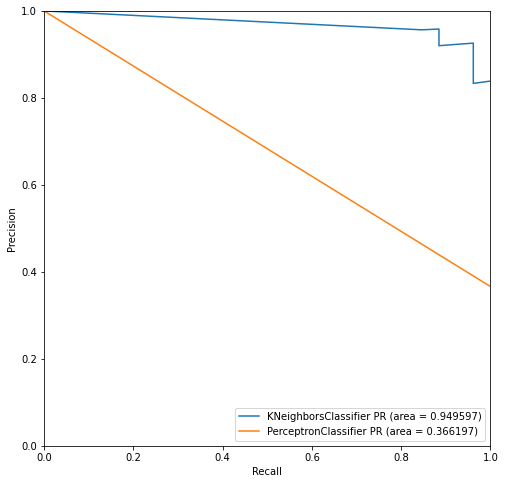

In [50]:
plt.figure(figsize=(8,8))

precision, recall, thresholds = precision_recall_curve(test_y_inversion, ky_pred[:,0])
aps_ky0 = average_precision_score(test_y_inversion,ky_pred[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_ky0)) 

precision, recall, thresholds = precision_recall_curve(test_y_inversion, py_pred[:,0])
aps_py0 = average_precision_score(test_y_inversion,py_pred[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_py0)) 

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

plt.figure(figsize=(8,8))

precision, recall, thresholds = precision_recall_curve(y_test, ky_pred[:,1])
aps_ky1 = average_precision_score(y_test,ky_pred[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_ky1)) 

precision, recall, thresholds = precision_recall_curve(y_test, py_pred[:,1])
aps_py1 = average_precision_score(y_test,py_pred[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_py1))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

In [54]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
#%matplotlib inline

mnist = fetch_openml("mnist_784")
y = mnist.target
print(y)
y = y.astype(np.uint8)
n_classes = len(set(y))

Y = label_binarize(mnist.target, classes=[*range(n_classes)])

X_train, X_test, y_train, y_test = train_test_split(mnist.data,
                                                    Y,
                                                    random_state = 42)

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=50,
                             max_depth=3,
                             random_state=0))
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
